In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model


In [2]:
df = pd.read_csv('database/carprices.csv')
df.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [3]:
dm = pd.get_dummies(df['Car Model'])
dm.head()

,Audi A5,BMW X5,Mercedez Benz C class
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False


In [4]:
dummy_df = pd.concat([df, dm], axis=1).drop(['Car Model', 'Mercedez Benz C class'], axis=1)
dummy_df

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,False,True
1,35000,34000,3,False,True
2,57000,26100,5,False,True
3,22500,40000,2,False,True
4,46000,31500,4,False,True
5,59000,29400,5,True,False
6,52000,32000,5,True,False
7,72000,19300,6,True,False
8,91000,12000,8,True,False
9,67000,22000,6,False,False


In [5]:
x = dummy_df.drop('Sell Price($)', axis=1).values
y = dummy_df['Sell Price($)'].values

In [6]:
r = linear_model.LinearRegression()
r.fit(x, y)
r.score(x, y)

0.9417050937281082

Text(0, 0.5, 'Sell Price($)')

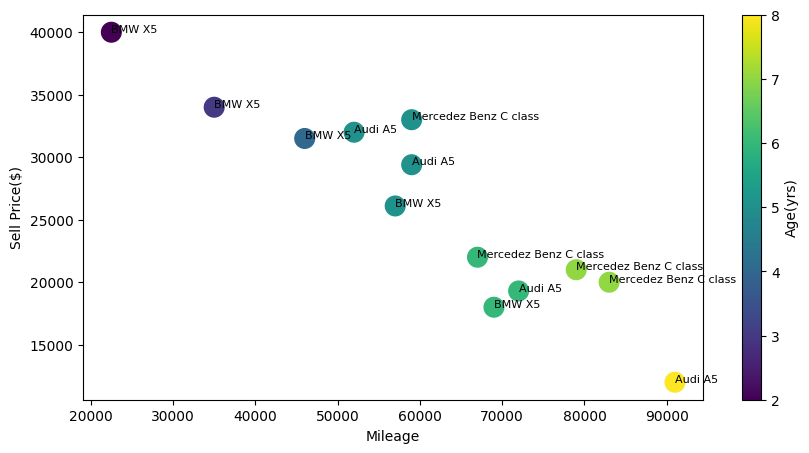

In [7]:
%matplotlib inline
x = df['Mileage'].values
y = df['Sell Price($)'].values
z = df['Age(yrs)']
fig, ax = plt.subplots(figsize=(10, 5))
scat = ax.scatter(x, y, c=z, s=200)
for i, txt in enumerate(df['Car Model']):
    ax.annotate(txt, (x[i], y[i]), fontsize=8)
fig.colorbar(scat, ax=ax, label='Age(yrs)')
ax.set_xlabel('Mileage')
ax.set_ylabel('Sell Price($)')